In [123]:
import requests
from bs4 import BeautifulSoup
import re
import spacy
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np

1. Obtencion del contenido de la web

In [124]:
url = 'https://es.wikipedia.org/wiki/Alan_Turing'
webpage_response = requests.get(url)

In [125]:
webpage = webpage_response.content
soup = BeautifulSoup(webpage, "html.parser")

In [126]:
paragraph = soup.select("p:nth-of-type(2)")[0]
text = paragraph.get_text().strip().strip()

2. aplicación de diferentes técnicas de preprocesamiento de texto

a. Elimina todos los signos de puntuación y todo aquello que no sean palabras1.

In [127]:
text = re.sub("\.|\(\d+\)|:", "", text)

b. Cambia todas las palabras a minúsculas.

In [128]:
text = text.lower()

c. Tokeniza la cadena obtenida

In [129]:
nlp = spacy.load('es_core_news_sm')

tokens = nlp(text)

C:\Python311\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


d. Lematiza la cadena obtenida

In [130]:
tokens_lemmas = [token.lemma_ for token in tokens]

e. Elimina todas las palabras irrelevantes

In [131]:
filtered_tokens = [token.lemma_ for token in tokens if not token.is_stop]

3. Categorización del texto:

In [132]:
text_categories = {
    "ADJ": 0,
    "ADV": 0,
    "NOUN": 0,
    "VERB": 0
}

for token in tokens:
    category = token.pos_
    if category in text_categories:
        text_categories[category] = text_categories[category] + 1

if text_categories["VERB"] > 5:
    print("El texto es narrativo")
elif text_categories["NOUN"] > 5:
    print("El texto es informativo")
elif text_categories["ADJ"] > 2:
    print("El texto es descriptivo")
elif text_categories["ADV"] > 2:
    print("El texto es explicativo")
else:
    print("La categoría del texto es desconocida")

El texto es informativo


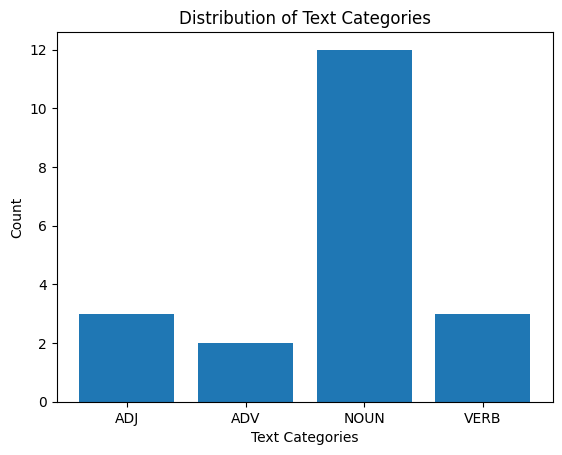

In [133]:
plt.bar(text_categories.keys(), text_categories.values())
plt.xlabel('Text Categories')
plt.ylabel('Count')
plt.title('Distribution of Text Categories')
plt.show()